# Concepts

Define notations:  

* $S_0$:= Current stock price. 
* $S_t$:= Stock price at time $t$. 
* $T$:= Time to expiration of option. 
* $c$:= Value of Euro call option to buy one share at current time. 
* $p$:= Value of Euro put option to sell one share at current time. 
* $r$:= Continuously compounded risk-free rate of interest for an investment maturing in time T. 
* $q$:= Continuously compounded dividend. 
* $K$:= Strike price of option. 
* $\Phi$:= The CDF of the Standard normal distribution. 
<!-- * $\sigma$:= The unit time std of log-return.  -->

### Put call parity [Hull, ch:11.4]

Assuming that there is no dividend, and that the call and put options have the same strike price, being $K$ at time $T$. 
The following relationship is called the *Put Call Parity*: 

$$c + Ke^{-rT} = p + S_0$$

### Implied Volatility [Hull, ch:15.11]

The volatility implied by option prices observed in the market is known as the *Implied Volatility*. Recall the Black-Scholes-Merton formula for the prices of Euro call and put options (*BSM pricing formula*, see [Hull, ch:15.8]): 

$$
c = S_0\Phi(d1) - Ke^{-rT}\Phi(d2)\; \text{  ,and  }\; p=KE^{-rT}\Phi(-d2)-S_0\Phi(-d1) \; . 
$$ 

Where 

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}} \qquad\text{and}\qquad
d_2 = d_1 - \sigma\sqrt{t} \; .
$$

The *Implied Volatility* is the value of $\sigma$, when substituded into the BSM pricing formula, produces the desired $c$ and $p$ with pre-determined $S_0$, $K$, $r$, and $T$. 

### Volatility Smile [Hull, ch:20]

A plot of implied volatility of an option with a certain life as a function of its strike price is known a *Volatility Smile*. 

This is the same for Euro Call and Put ([Hill, ch:20.1], a result of the Put Call Parity). 

### Jumps 

The *Jumps* are the non-continuous changes occur in the stock price, intuitively, the "sudden changes" impacting the stock, this is simulated with through the *Compounded Poisson Process* in our model. 

#### Poisson distribution

Let $\lambda$ be the *average rate of occurrence in unit time (i.e. intensity)*, the *Poisson Distribution with intensity $\lambda$*, denoted $X \sim Poison(\lambda)$ has pmf

$$
P(X=k) = \begin{cases}
        \frac{e^{-\lambda t} (\lambda t)^k}{k!} & k \in \mathbb{N}_{\geq 0} \\ 
        0 & o.w. 
\end{cases}
$$

Where $t$ is the time span, measured in unit time. Intuitively, the pmf of the Poisson distribution is the *probability of $k$ occurrence during the time span $t$*. 
We have that $\mathbb{E}[X]=Var(X)=\lambda t$. 

#### The Poisson process 

Let $N_t\in \mathbb{N}_{\geq 0}$ counts how many events (jumps, for our context) has occurred up to time $t$. Then for $h>0$, we have 

$$
P(N_{t+h}-N_t = k) = e^{-\lambda h}\frac{(\lambda h)^k}{k!}
$$

We have that $\mathbb{E}[N_t]=\lambda t$, and $Var(N_t)=\lambda t$. This $N_t$ is known as the *Poisson Process*. 

#### Compounded Poisson Process (CPP)

Let $\{{Y_k}\}_{k\geq 1}$ be i.i.d *log jump sizes*, independent of Poisson Process $N_{t}$'s. We define the *Compound Poisson Process (CPP)* as 

$$
J_t := \sum\limits^{N_t}_{k=1} Y_k 
$$

With convention that $J_t:=0$ when $N_t=0$. 

<!-- Intuitively, this provides the *sum of jump impact* in our context.  -->
Under the assumption that $\mathbb{E}[|Y|]<\infty$ (here $Y$ has the same distribution as any of the $Y_k$'s), we have: 

* $\mathbb{E}[J_t]=\lambda t \mathbb{E}[Y]$ 
* $Var(J_t)=\lambda t \mathbb{E}[Y^2]$

Both of above are received through simple algebra, with the linearity of expected value and law of total variance. 

The CPP will be applied as the *log jump of asset* (i.e. the jump happening at $k$, being $Y_k$, will multiply the asset value by $e^{Y_k}$). 

### Instantaneous Variance of return (Not sure)

The *instantaneous variance of return* is 

$$
v_t:=\lim\limits_{\Delta t \to 0} \frac{1}{\Delta t} Var(log(S_{t+\Delta t}) - log(S_t)|\mathcal{F}_t)\; \text{Without the non-continuous impact (i.e. ignoring jumps) over time span } \Delta t
$$

Where $\mathcal{F}_t$ is a filtration that can be understood at the *information up to time $t$*, to be concise, this means that the variance is conditioned on history ending at $t$. 

<!-- Intuitively, the instantaneous variance of return is the rate at with the continuous part of the log-returns accumulates variance.  -->

### Martingale 

A stochastic process $Y_t$ is a *Martingale* if for all $t$, we have: 
* $\mathbb{E}[|Y_t|]<\infty$. 
* $\mathbb{E}[Y_t|\{Y_{\tau}, \tau\leq s\}]=Y_s$ for all $s\leq t$. 

### Brownian motion 

The *Brownian motion* is a continuous stochastic process $W(t)$ for $t\geq 0$ where: 
* $W(0)=0$. 
* For any $0\leq t_0\leq t_1\leq, \cdots, t_n$, $W(t_{i+1})-W(t_{i})$'s are independent. 
* $W(t_{i+1})-W(t_{i})\sim \mathcal{N}(0,t_{i+1}-t_{i})$. 

A Brownian motion is necessarily a Martingale. 

### Generalized Wiener Process 

A *Stochastic Differential Equation (SDE)* is called *Generalized Wiener Process (GWP)* when it is in the form of 

$$
dX(t)=\mu(t, X(t))\;dt + \sigma(t,X(t))\;dW(t)
$$

Where $W(t)$ is a *Brownian motion* (We say this SDE is *driven by $W(t)$*), $\mu$ is called the *drift*, $\sigma$ is called the *diffusion*. ([StSh, ch:6.2]). 



We collect following properties of GWP: 

* A GWP is a *Martingale* iff the drift is zero. 

### Ito's Formula [StSh, ch:4.4]

If $f(t,x)$ has continuous partial derivatives once in $t$ and twice in $x$, then, for a GWP as in "Generalized Wiener Process" above: 

$$
df(t,X(t)) = f_t\;dt + f_xdX(t) + \frac{1}{2}f_{xx}(dX(t))^2 = (f_t + \mu f_x + \frac{1}{2} \sigma^2 f_{xx})dt + \sigma f_x dW(t) \; . 
$$

For a vector $X(t)\in \mathbb{R}^n$ (with $W(t)\in \mathbb{R}^m$) in form 

$$ 
dX(t)=\mu(t,X(t))\;dt + \Sigma(t,X(t))\;dW(t) \; ,
$$

let $a:=\Sigma(t,X(t))\Sigma(t,X(t))^{\top}$, 
the *Ito's formula* says: 

$$
df(t, X(t))=f_t\;dt + \nabla f^{\top} dX(t) + \frac{1}{2}Tr(a\nabla^2f) dt \; . 
$$

### Quadratic Covariation (Variance version can be seen at [StSh, ch:3.4.2])

Let $f_1$ and $f_2$ be a functions defined on $t\in [0,T]$. The *Quadratic Covariance* of pair $(f_1, f_2)$ up to time $T$ is 

$$
[f_1, f_2](T):=\lim\limits_{|\Pi|\to 0} \sum\limits_{j=0}^{n-1}(f_1(t_{j+1})-f_1(t_j))(f_2(t_{j+1})-f_2(t_j))\; ,
$$ 

where $\Pi:=\{0=t_0,\cdots, t_n=T\}$ with $t_{j}<t_{j+1}$. 

In context when $T$ is clear, we simply write $[f_1, f_2]$ instead, and often denote $d[f_1, f_2]:=df_1\; df_2$ (both sides in respect to $t$, "$dW_1(t)\;dW_2(t)=\rho\; dt$" in "Heston model (Risk neutral)" below is an example of this notation, see [StSh, ch:3.4.2] for more example of this notaion). 

### Heston model (Risk neutral)

In context of *Heston Model*, we define $X(t):=(S_t, v_t)^{\top}$ where 
* $S_t$:= Stock price at time $t$ 
* $v_t$:= *Instantaneous variance* of log return (same as instantaneous variance of simple return)

We also define the *Brownian Drivers* in current context: $W(t):=(W_1(t), W_2(t))^{\top}$ with $dW_1(t)\;dW_2(t)=\rho\; dt$ for $\rho\in [-1,1]$. 
$\rho$ is the instantaneous correlation between S_t and v_t. 

The GWP of *(Risk Neutral) Heston Model* is given by 

$$
dX(t)=b(X(t))dt + \Sigma(X(t))dW(t)\; ,
$$

where $b(S,V):=\begin{pmatrix}(r-q)S \\ \kappa (\theta - v)\end{pmatrix}$, and $\Sigma(S,V):=\begin{pmatrix}\sqrt{v}S & 0 \\ 0 & \sigma\sqrt{v}\end{pmatrix}$ with $\kappa$ being the speed of mean reversion of $v_t$, $\theta$ being the long run mean level of $v_t$, and $\sigma$ being the variance of $v_t$. 

The *Instantaneous Covariance* of $(dS_t, dv_t)$ is $\Sigma \begin{pmatrix}1 & \rho \\ \rho & 1\end{pmatrix} \Sigma^{\top} \; dt = \begin{pmatrix}v_tS_t^2 & \rho \sigma v_t S_t \\ \rho \sigma v_t S_t & \sigma^2 v\end{pmatrix}\; dt$

**Remark**: The "Risk Neutral" is achieved through the *Girsanov's Theorem* (e.g. see [StSh, ch:5.4.1]) by applying a change of measure from "Real world probability measure" to "risk-neutral measure $Q$". It should be noted that this is significant because the SDE for discounted price under the risk neutral model has zero drift, making it a Martingale. 

### Bates model (Risk Neutral)

#### The GWP SDE of Risk Neutral Bates Model 

Intuitively, the *Risk Neutral Bates Model* adds Jump impact (simulated with Poisson process) to the risk neutral Heston model. 

We inherit notations $S_t$, $v_t$, $\rho$, $\sigma$, $\kappa$, and $W(t)$ from the context of risk neutral Heston model. 

We add that: 
* $N\sim N_t$ being Poisson process with intensity $\lambda$ (As introduced in "The Poisson Process" above). 
* $Y\sim Y_k \sim\mathcal{N}(\mu_Y, \delta^2_Y)$ i.i.d, and independent of $(W_1(t), W_2(t), N)$. These $Y_k$'s are the *log jump* of the stock price (As introduced in "Compounded Poisson Process (CPP)" above). 
* $S_{t^-}:= \lim\limits_{s\to t} S_s$. 
* $\kappa_Y:=\mathbb{E}[e^Y-1]=e^{\mu_Y+\frac{1}{2}\delta^2_Y}-1$. 

The GWP of *Risk Neutral Bates Model* is (we will not be using the matrix form here): 

$$
dS_t = (r-q-\lambda\kappa_Y)S_{t^-}\; dt + \sqrt{v_t}S_{t^-}\;dW_1(t) + (e^Y - 1)S_{t^-}\; dN_t\;, \\ 
dv_t = \kappa(\theta - v_t)\; dt + \sigma\sqrt{v_t}\;dW_2(t)\; , \\ 
\text{ and } dW_1(t)dW_2(t)= \rho\; dt\; .
$$

We also provide the log price form (Received by applying the Ito's formula): 

$$
d(log(S_t))= (r-q-\lambda\kappa_Y-\frac{v_t}{2})\; dt + \sqrt{v_t}\; dW_1(t) + Y\; dN_t\; . 
$$

The *Instantaneous Covariance* of $(dS_t, dv_t)$ remains $\begin{pmatrix}v_tS_t^2 & \rho \sigma v_t S_t \\ \rho \sigma v_t S_t & \sigma^2 v\end{pmatrix}\; dt$. 

**Remark**: Let there be a jump at time $\tau$, then there is discontinuity in $S_{\tau}$, and we can express $S_{\tau}=S_{\tau^-}e^Y$. The jump adds discontinuity to $S_t$ only. 

#### "Solving" the SDE of Risk Neutral Bates Model 

We denote $X_t:= log(S_t)$ and take the integral: 

$$ 
X_T = X_0 + \int_0^T (r-q-\lambda\kappa_Y-\frac{1}{2}v_s)\;ds + \int_0^T \sqrt{v_s}\; dW_1(s) + \sum\limits_{k=1}^{N_T} T_k\; , \\ 
v_T = v_0 + \int_0^T\kappa(\theta - v_s)\; ds + \int_0^T\sigma\sqrt{v_s}\; dW_2(s)\; . 
$$

##### **We first focus on the Brownian pair $(W_1, W_2)$**: 

It must satisfy: 
$$
\mathbb{E}[\Delta W_*]=0\; , \text{ and } \; Var(\Delta W_*) = \Delta t\; . 
$$
Now, notice that 
$$
Cov(\Delta W_1, \Delta W_2) = \mathbb{E}[\Delta W_1 \Delta W_2] - \mathbb{E}[\Delta W1]\mathbb{E}[\Delta W_2] = \mathbb{E}[\Delta W_1 \Delta W_2]\; . 
$$
We observe with that (this is just product rule)
$$
\Delta (W_1 W_2) = W_1(t+\Delta t) W_2(t+\Delta t) - W_1(t)W_2(t) = W_1(t)\Delta W_2 + W_2(t)\Delta W_1 + \Delta W_1\Delta W_2\; . 
$$
By *Boob-Meyer characterization* of $[W_1,W_2]$, we have that 
$$
W_1W_2-[W_1,W_2] \text{ is a Martingale} \implies \mathbb{E}[\Delta(W_1 W_2)] = \mathbb{E}[\Delta[W_1, W_2]]\; .  
$$
Since both $W_1$ and $W_2$ are Brownian motions (and hence, Martingales), we have 
$$
\mathbb{E}[\Delta W_1\Delta W_2]=\mathbb{E}[\Delta[W_1,W_2]]\; .
$$
This means that the Brownian pair must ALSO satisfy: 
$$
Cov(\Delta W_1, \Delta W_2)=\rho \Delta t\; . 
$$
By definition of Brownian motion and above, the pair $(\Delta W_1, \Delta W_2)$ is a bivariate normal distribution with covariance matrix 
$$
\begin{pmatrix}\Delta t & \rho \Delta t \\ \rho\Delta t & \Delta t\end{pmatrix}\; , 
$$
and mean $\mu=(0,0)^{\top}$. 
Solving $LL^{\top}=\begin{pmatrix}\Delta t & \rho \Delta t \\ \rho\Delta t & \Delta t\end{pmatrix}$, we have 
$$
L=\sqrt{\Delta t}\begin{pmatrix}1 & 0 \\ \rho & \sqrt{1-\rho^2}\end{pmatrix}\; . 
$$
**This allows us to simulate $(\Delta W_1, \Delta W_2)$** discretely with: 

Let $Z_1, Z_2 \sim \mathcal{N}(0,1)$ i.i.d.., we have that: 
$$
\begin{pmatrix}\Delta W_1 \\ \Delta W_2\end{pmatrix} = L \begin{pmatrix}Z_1 \\ Z_2\end{pmatrix} = \begin{pmatrix}\ \sqrt{\Delta t}Z_1\\ \rho\sqrt{\Delta t}Z_1 + \sqrt{1-\rho^2}\sqrt{\Delta t}Z_2 \end{pmatrix}\; . 
$$

#### **Creating the Volatility**: 
The key is noticing that we can NOT allow negative volatility, so we will have to "Force non-negativity" through 
$$
v^+_n:=max(v_n, 0)\; . 
$$
And we have 
$$
v_{n+1} = v_n + \kappa(\theta - v_n^+)\Delta t + \sigma\sqrt{v_n^+} \Delta W_2\; 
$$
in the time-recursive update before we set $v_{n+1}^+:= max(v_{n+1},0)$. 

Notice that, unfortunately, this can not be done in a "vectorized" way. 

#### **We move on the considering the jumps between $[t_{n}, t_{n+1}]$**: 

Between time steps $t_n$ and $t_{n+1}$, we have: 
* Number of jumps: $K\sim Poisson(\lambda \Delta t)$. 
* Given that $K$ is positive, we draw $Y_1,\cdots, Y_K\sim \mathcal{N}(\mu_Y, \delta^2_Y)$ i.i.d.. 
* Given $K$ positive, we have the *compounded jump* between the two time steps be 
$$
\Delta Y = (\sum\limits_{k=1}^{K} Y_k) \sim \mathcal{N}(K\mu_Y, K\delta^2_Y)\; . 
$$
* And $\Delta Y=0$ if $K=0$. 

#### **Bring everything together to create the time recursive model**: 
We have 
$$
X_{n+1} = X_n + (r-q-\lambda\kappa_Y - \frac{v_n^+}{2})\Delta t + \sqrt{v_n^+}\Delta W_1 + \Delta J\; . 
$$
And then $S_{n+1}= e^{X_{n+1}}$. 

We summarize what has to be done in the simulation of stock prices: 
* Create the discrete Brownian pairs according the $\Delta t$. 
* The $v_n$'s have to be done in the time-recursive way. 
* The jumps between time steps can be created in a vectorized way. 
* The difference between $X_n$'s and the next can be created in a vectorized way. Then the $X_n$'s can be created with a np.cumsum before used as power of $e$ to create the actual stock price $S_n$'s. 

In [45]:
import importlib 
import sys 

sys.path.append("../")

from proj_mod import stock_sim 
importlib.reload(stock_sim); 

In [68]:
vol_param=stock_sim.Vol_params(kappa=1.5, theta=0.04, sigma=0.5, rho=-0.7, v0=0.04)
jump_param=stock_sim.Jump_params(lam_J=1, mu_J=0, sig_J=0.2)
market_param=stock_sim.Market_params(r=0.05, q=0.05)
Bates_param=stock_sim.Bates_params(s0=100, vol=vol_param, jump=jump_param, market=market_param)

Bates_model=stock_sim.Bates_model_risk_free(params=Bates_param)

In [69]:
Bates_model.create_paths(n_paths=10, n_steps=252, time_len=1, seed=420)

In [70]:
Bates_model.S_

array([[100.        ,  99.42572266,  97.77100578, ...,  88.71595578,
         89.32945858,  88.95977336],
       [100.        ,  97.85500691,  98.69135021, ..., 116.95310198,
        116.58323884, 116.25059329],
       [100.        , 100.43089109,  99.81122621, ..., 122.91850782,
        124.70483082, 122.85333336],
       ...,
       [100.        , 100.76521788,  99.51890782, ...,  89.24277802,
         89.38666997,  89.8498529 ],
       [100.        , 100.65554276,  99.62403305, ..., 109.49634547,
        109.12862788, 110.51186849],
       [100.        , 101.01121264, 100.82450676, ...,  90.78282044,
         90.19220818,  90.41880055]])

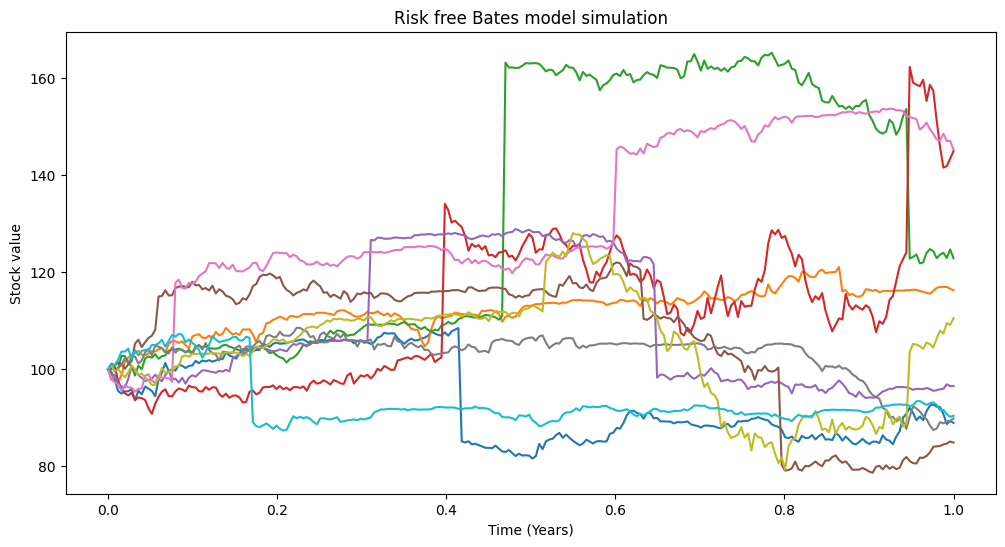

In [71]:
Bates_model.draw_paths()

# References 

[Hull] Options, Futures, and Other Derivatives 

[StSh] Stochstic Calculus for Finance II 